LINEAR REGRESSION MODEL - SALARY PREDICTION

Model Coefficient (Slope): 5000.00
Model Intercept: 20000.00

Training R² Score: 1.0000
Testing R² Score: 1.0000
Root Mean Squared Error: 0.00

PREDICTIONS FOR NEW DATA
Experience: 3.5 years → Predicted Salary: $37,500.00
Experience: 7.5 years → Predicted Salary: $57,500.00
Experience: 11.0 years → Predicted Salary: $75,000.00


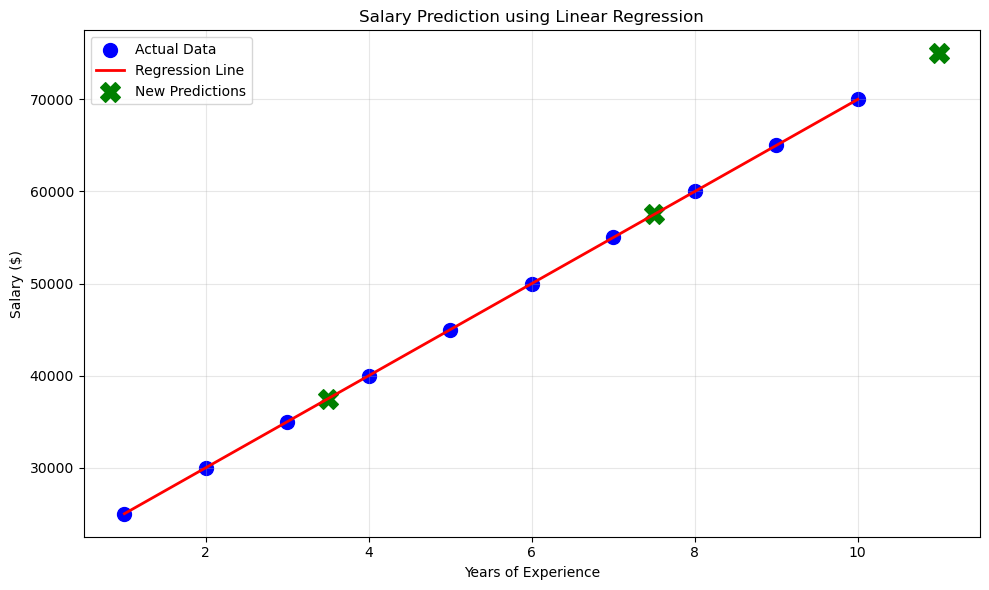

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample data: Years of Experience vs Salary
data = {
    'experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'salary': [25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000]
}

df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df[['experience']].values  # Independent variable
y = df['salary'].values         # Dependent variable

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

# Print results
print("=" * 50)
print("LINEAR REGRESSION MODEL - SALARY PREDICTION")
print("=" * 50)
print(f"\nModel Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"\nTraining R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Make predictions for new data
print("\n" + "=" * 50)
print("PREDICTIONS FOR NEW DATA")
print("=" * 50)
new_experiences = np.array([[3.5], [7.5], [11]])
predictions = model.predict(new_experiences)

for exp, pred_salary in zip(new_experiences.flatten(), predictions):
    print(f"Experience: {exp} years → Predicted Salary: ${pred_salary:,.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', s=100)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.scatter(new_experiences, predictions, color='green', marker='X', s=200, label='New Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Salary Prediction using Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()